In [1]:
import os
import sys

PROJECT_ROOT = os.path.abspath("..")
sys.path.insert(0, PROJECT_ROOT)

SPLITS_DIR = os.path.join(PROJECT_ROOT, "data", "splits")
MODEL_DIR  = os.path.join(PROJECT_ROOT, "models", "distilbert")
PLOTS_DIR  = os.path.join(PROJECT_ROOT, "outputs", "plots")
PREDS_DIR  = os.path.join(PROJECT_ROOT, "outputs", "predictions")

os.makedirs(MODEL_DIR, exist_ok=True)
os.makedirs(PLOTS_DIR, exist_ok=True)
os.makedirs(PREDS_DIR, exist_ok=True)

print("Paths ready")

Paths ready


In [2]:
for f in ["train.csv", "val.csv", "test.csv"]:
    path = os.path.join(SPLITS_DIR, f)
    print(f, "->", "FOUND" if os.path.exists(path) else "MISSING", "|", path)

train.csv -> FOUND | /Users/amatyaumanga/Downloads/Applied-Machine-Learning-Coursework/data/splits/train.csv
val.csv -> FOUND | /Users/amatyaumanga/Downloads/Applied-Machine-Learning-Coursework/data/splits/val.csv
test.csv -> FOUND | /Users/amatyaumanga/Downloads/Applied-Machine-Learning-Coursework/data/splits/test.csv


/Users/amatyaumanga/Downloads/Applied-Machine-Learning-Coursework/.venv/lib/python3.14/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Using device: mps


Map: 100%|██████████| 517/517 [00:00<00:00, 70347.29 examples/s]
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/Users/amatyaumanga/Downloads/Applied-Machine-Learning-Coursework/src/train_bert.py:288: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
/Users/amatyaumanga/Downloads/Applied-Machine-Learning-Coursework/.venv/lib/python3.14/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.055200,0.045953,0.986460,0.968254,0.924242,0.945736
2,0.029000,0.041065,0.990329,0.984127,0.939394,0.961240
3,0.039500,0.042871,0.990329,0.984127,0.939394,0.961240


/Users/amatyaumanga/Downloads/Applied-Machine-Learning-Coursework/.venv/lib/python3.14/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)
/Users/amatyaumanga/Downloads/Applied-Machine-Learning-Coursework/.venv/lib/python3.14/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


 Saved best checkpoint to: /Users/amatyaumanga/Downloads/Applied-Machine-Learning-Coursework/models/distilbert/best_checkpoint
Saved training logs: /Users/amatyaumanga/Downloads/Applied-Machine-Learning-Coursework/models/distilbert/training_logs.json


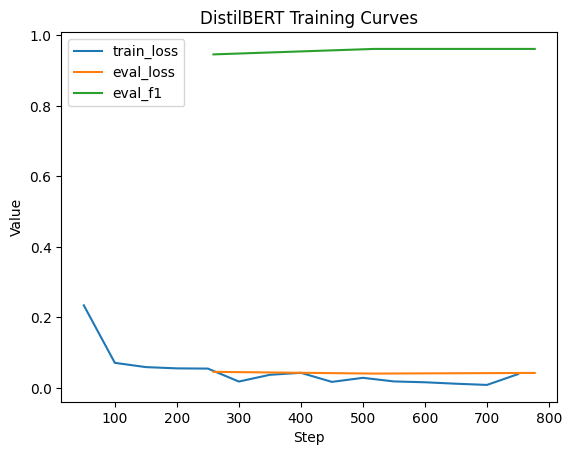

Saved: /Users/amatyaumanga/Downloads/Applied-Machine-Learning-Coursework/outputs/plots/bert_training_curves.png


/Users/amatyaumanga/Downloads/Applied-Machine-Learning-Coursework/.venv/lib/python3.14/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)



Classification report:

              precision    recall  f1-score   support

         ham       0.99      1.00      1.00       452
        spam       0.98      0.95      0.97        65

    accuracy                           0.99       517
   macro avg       0.99      0.98      0.98       517
weighted avg       0.99      0.99      0.99       517



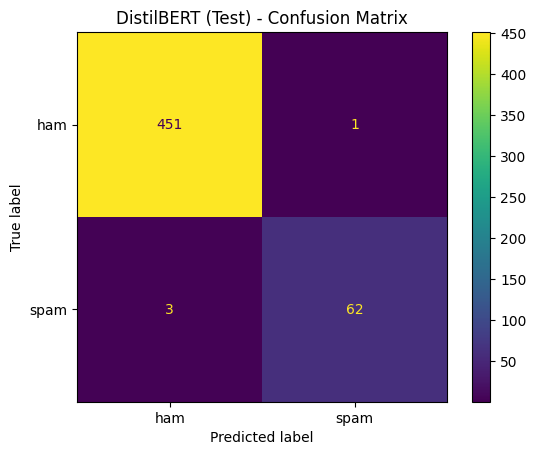

Saved: /Users/amatyaumanga/Downloads/Applied-Machine-Learning-Coursework/outputs/plots/bert_confusion_matrix.png


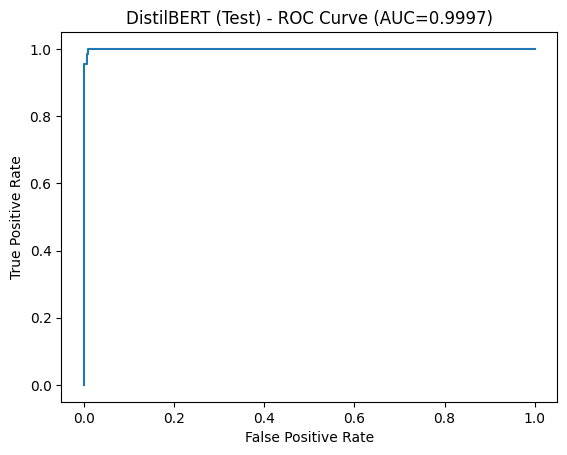

Saved: /Users/amatyaumanga/Downloads/Applied-Machine-Learning-Coursework/outputs/plots/bert_roc_curve.png


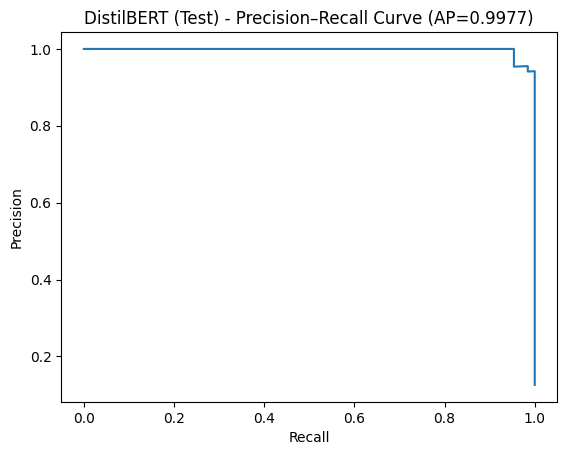

Saved: /Users/amatyaumanga/Downloads/Applied-Machine-Learning-Coursework/outputs/plots/bert_pr_curve.png
DistilBERT test metrics: {'accuracy': 0.9922630560928434, 'precision': 0.9841269841269841, 'recall': 0.9538461538461539, 'f1': 0.96875, 'roc_auc': 0.9996596324029953, 'ap': 0.9977199741638416}
Saved sample predictions: /Users/amatyaumanga/Downloads/Applied-Machine-Learning-Coursework/outputs/predictions/bert_sample_predictions.csv
Saved metadata: /Users/amatyaumanga/Downloads/Applied-Machine-Learning-Coursework/models/distilbert/bert_metadata.json
DistilBERT test metrics: {'accuracy': 0.9922630560928434, 'precision': 0.9841269841269841, 'recall': 0.9538461538461539, 'f1': 0.96875, 'roc_auc': 0.9996596324029953, 'ap': 0.9977199741638416}


In [3]:
from src.train_bert import run_distilbert_pipeline, DistilBertConfig

cfg = DistilBertConfig(
    model_name="distilbert-base-uncased",
    max_length=128,
    seed=42,
    num_train_epochs=3,
    learning_rate=2e-5,
    weight_decay=0.01,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=32,
    warmup_ratio=0.0
)

metrics = run_distilbert_pipeline(
    train_csv=os.path.join(SPLITS_DIR, "train.csv"),
    val_csv=os.path.join(SPLITS_DIR, "val.csv"),
    test_csv=os.path.join(SPLITS_DIR, "test.csv"),
    model_dir=MODEL_DIR,
    plots_dir=PLOTS_DIR,
    preds_dir=PREDS_DIR,
    cfg=cfg
)

print("DistilBERT test metrics:", metrics)